<a href="https://colab.research.google.com/github/VulcanLogicWeaver/UsedCars/blob/main/Project2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Based vehicles.csv file from data folder, build a dataframe

import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

vehicles = pd.read_csv('/bin/data/vehicles.csv')
#vehicles.head()
print(vehicles.isnull().sum())

id                   0
region               1
price                1
year              1036
manufacturer     14860
model             4475
condition       140838
cylinders       146745
fuel              2387
odometer          3646
title_status      6495
transmission      2125
VIN             133442
drive           109643
size            254356
type             77295
paint_color     108320
state                1
dtype: int64


In [ ]:
# Retain only the following columns in the used_cars dataframe.  ID, Price, Year, Manufacturer, Odometer, Title Status, Condition, Transmission
used_cars = vehicles[['id', 'price', 'year', 'manufacturer', 'odometer', 'title_status', 'condition', 'transmission']]
print(used_cars.isnull().sum())
print('Total rows in Vehicles dataset:', len(used_cars))
used_cars = used_cars.dropna()
print('Total rows in used cars data:', len(used_cars))

id                   0
price                1
year              1036
manufacturer     14860
odometer          3646
title_status      6495
condition       140838
transmission      2125
dtype: int64
Total rows in Vehicles dataset: 354274
Total rows in used cars data: 197830


In [ ]:
# Filter the used_cars dataframe to only car prices between $1,000 & $100,000; and cars after 1990
used_cars['year'] = used_cars['year'].astype(int)
used_cars['odometer'] = used_cars['odometer'].astype(int)
used_cars = used_cars[(used_cars['odometer'] <= 500000)]
used_cars = used_cars[(used_cars['price'] > 1000) & (used_cars['price'] <= 100000)]
used_cars = used_cars[used_cars['year'] >= 1990]
used_cars_sorted = used_cars.sort_values(by='price', ascending=False)
print('Unique models:', used_cars['manufacturer'].nunique())
#print(used_cars_sorted.head())
print(used_cars_sorted.describe())
print('Total rows:', len(used_cars_sorted))

Unique models: 41
                 id          price           year       odometer
count  1.795580e+05  179558.000000  179558.000000  179558.000000
mean   7.311548e+09   18626.197318    2012.109775   90616.481454
std    4.408553e+06   13094.404669       6.023659   65084.531859
min    7.301583e+09    1004.000000    1990.000000       0.000000
25%    7.308217e+09    7500.000000    2008.000000   33023.250000
50%    7.312792e+09   15990.000000    2013.000000   83617.000000
75%    7.315325e+09   27990.000000    2017.000000  135380.000000
max    7.317082e+09  100000.000000    2022.000000  500000.000000
Total rows: 179558


In [ ]:
# Create a one hot encoding for 'condition' column
used_cars_condition = used_cars_sorted[['price', 'condition']]

# Apply one-hot encoding to the 'condition' column
used_cars_condition = pd.get_dummies(used_cars_condition, columns=['condition'], prefix='condition')

print(used_cars_condition.head())
print('Total rows:', len(used_cars_condition))

# Calculate the correlation matrix
correlation_matrix = used_cars_condition.corr()

# Get correlations of dummy condition columns with the 'price' column
condition_corr = correlation_matrix['price'].filter(like='condition_')

# Print the correlations
print("\nCorrelation of dummy 'condition' columns with 'price':")
condition_corr.sort_values(ascending=False)

           price  condition_excellent  condition_fair  condition_good  \
71926   100000.0                False            True           False   
6757    100000.0                False           False           False   
193080  100000.0                 True           False           False   
121364  100000.0                False           False           False   
44134    99999.0                 True           False           False   

        condition_like new  condition_new  condition_salvage  
71926                False          False              False  
6757                 False           True              False  
193080               False          False              False  
121364                True          False              False  
44134                False          False              False  
Total rows: 179558

Correlation of dummy 'condition' columns with 'price':


,price
condition_good,0.229082
condition_new,0.049387
condition_like new,0.019195
condition_salvage,-0.039367
condition_fair,-0.162178
condition_excellent,-0.202379


In [ ]:
# Create a one hot encoding for 'title_status' column
used_cars_title_status = used_cars_sorted[['price', 'title_status']]

# Apply one-hot encoding to the 'title_status' column
used_cars_title_status = pd.get_dummies(used_cars_title_status, columns=['title_status'], prefix='title_status')

print(used_cars_title_status.head())
print('Total rows:', len(used_cars_title_status))

# Calculate the correlation matrix
correlation_matrix = used_cars_title_status.corr()

# Get correlations of dummy condition columns with the 'price' column
condition_corr = correlation_matrix['price'].filter(like='title_status_')

# Print the correlations
print("\nCorrelation of dummy 'Title Status' columns with 'price':")
condition_corr.sort_values(ascending=False)

           price  title_status_clean  title_status_lien  title_status_missing  \
71926   100000.0                True              False                 False   
6757    100000.0                True              False                 False   
193080  100000.0                True              False                 False   
121364  100000.0                True              False                 False   
44134    99999.0                True              False                 False   

        title_status_parts only  title_status_rebuilt  title_status_salvage  
71926                     False                 False                 False  
6757                      False                 False                 False  
193080                    False                 False                 False  
121364                    False                 False                 False  
44134                     False                 False                 False  
Total rows: 179558

Correlation of dummy 'Tit

,price
title_status_clean,0.081276
title_status_lien,0.022209
title_status_parts only,-0.013895
title_status_missing,-0.024324
title_status_rebuilt,-0.063583
title_status_salvage,-0.069922


In [ ]:
# prompt: create a one hot encoding for 'transmission' column
used_cars_transmission = used_cars_sorted[['price', 'transmission']]

# Apply one-hot encoding to the 'transmission' column
used_cars_transmission = pd.get_dummies(used_cars_transmission, columns=['transmission'], prefix='transmission')

print(used_cars_title_status.head())
print('Total rows:', len(used_cars_transmission))

# Calculate the correlation matrix
correlation_matrix = used_cars_transmission.corr()

# Get correlations of dummy condition columns with the 'price' column
condition_corr = correlation_matrix['price'].filter(like='transmission_')

# Print the correlations
print("\nCorrelation of dummy 'Transmission' columns with 'price':")
condition_corr.sort_values(ascending=False)

           price  title_status_clean  title_status_lien  title_status_missing  \
71926   100000.0                True              False                 False   
6757    100000.0                True              False                 False   
193080  100000.0                True              False                 False   
121364  100000.0                True              False                 False   
44134    99999.0                True              False                 False   

        title_status_parts only  title_status_rebuilt  title_status_salvage  
71926                     False                 False                 False  
6757                      False                 False                 False  
193080                    False                 False                 False  
121364                    False                 False                 False  
44134                     False                 False                 False  
Total rows: 179558

Correlation of dummy 'Tra

,price
transmission_other,0.485001
transmission_manual,-0.098389
transmission_automatic,-0.414570


In [ ]:
# Create a used_cars_sorted dataframe by grouping odometer column in groups of 10,000

import pandas as pd
used_cars_sorted['odometer_group'] = pd.cut(used_cars_sorted['odometer'], bins=range(0, used_cars_sorted['odometer'].max() + 10000, 10000), right=False, labels=[f'{i}-{i+9999}' for i in range(0, used_cars_sorted['odometer'].max() + 10000, 10000)][:-1])

print(used_cars_sorted[['odometer', 'odometer_group']].head())
print(used_cars_sorted['odometer_group'].value_counts().sort_index())

        odometer odometer_group
71926     195469  190000-199999
6757           5         0-9999
193080    139000  130000-139999
121364     13800    10000-19999
44134      22000    20000-29999
odometer_group
0-9999           12734
10000-19999      13772
20000-29999      14239
30000-39999      11911
40000-49999       9837
50000-59999       7292
60000-69999       7927
70000-79999       8562
80000-89999       8430
90000-99999       9246
100000-109999     9005
110000-119999     8656
120000-129999     8519
130000-139999     7750
140000-149999     7464
150000-159999     6417
160000-169999     5564
170000-179999     4660
180000-189999     3824
190000-199999     2938
200000-209999     2817
210000-219999     1786
220000-229999     1465
230000-239999     1165
240000-249999      919
250000-259999      672
260000-269999      439
270000-279999      379
280000-289999      260
290000-299999      217
300000-309999      190
310000-319999      105
320000-329999       81
330000-339999       57
340000-3499

In [ ]:
# Count the number of vehicles sold based on column title_status and generate the average price column

import pandas as pd
title_status_counts = used_cars_sorted['title_status'].value_counts().reset_index()
title_status_counts.columns = ['title_status', 'num_vehicles_sold']

avg_price_by_title_status = used_cars_sorted.groupby('title_status')['price'].mean().reset_index()
avg_price_by_title_status.columns = ['title_status', 'average_price']

title_status_summary = pd.merge(title_status_counts, avg_price_by_title_status, on='title_status')
print("\nNumber of vehicles sold and average price by title status:")
title_status_summary


Number of vehicles sold and average price by title status:


,title_status,num_vehicles_sold,average_price
0,clean,172590,18840.038971
1,rebuilt,3851,13002.312127
2,salvage,2024,10051.167984
3,lien,970,22572.196907
4,missing,87,4159.942529
5,parts only,36,5777.722222


In [ ]:
# Count the number of vehicles sold based on column transmission and generate the average price column

import pandas as pd
transmission_counts = used_cars_sorted['transmission'].value_counts().reset_index()
transmission_counts.columns = ['transmission', 'num_vehicles_sold']

avg_price_by_transmission = used_cars_sorted.groupby('transmission')['price'].mean().reset_index()
avg_price_by_transmission.columns = ['transmission', 'average_price']

transmission_summary = pd.merge(transmission_counts, avg_price_by_transmission, on='transmission')
print("\nNumber of vehicles sold and average price by transmission:")
transmission_summary.sort_values(by='average_price', ascending=False)


Number of vehicles sold and average price by transmission:


,transmission,num_vehicles_sold,average_price
1,other,47098,29276.665591
0,automatic,123590,14973.103366
2,manual,8870,12974.576888


In [ ]:
# Count the number of vehicles sold based on column condition and generate the average price column

import pandas as pd
condition_counts = used_cars_sorted['condition'].value_counts().reset_index()
condition_counts.columns = ['condition', 'num_vehicles_sold']

avg_price_by_condition = used_cars_sorted.groupby('condition')['price'].mean().reset_index()
avg_price_by_condition.columns = ['condition', 'average_price']

condition_summary = pd.merge(condition_counts, avg_price_by_condition, on='condition')
print("\nNumber of vehicles sold and average price by condition:")
condition_summary.sort_values(by='average_price', ascending=False)


Number of vehicles sold and average price by condition:


,condition,num_vehicles_sold,average_price
4,new,661,29265.183056
0,good,92640,21531.759434
2,like new,14559,19472.369462
1,excellent,67706,15220.082622
5,salvage,279,5559.143369
3,fair,3713,4011.881497


In [ ]:
# Create odometer in groups of 25000 and generate the average price column for the top 15 groups

import pandas as pd
used_cars_sorted['odometer_group_25000'] = pd.cut(used_cars_sorted['odometer'], bins=range(0, used_cars_sorted['odometer'].max() + 25000, 25000), right=False, labels=[f'{i}-{i+24999}' for i in range(0, used_cars_sorted['odometer'].max() + 25000, 25000)][:-1])

odometer_group_25000_summary = used_cars_sorted.groupby('odometer_group_25000')['price'].agg(['count', 'mean']).reset_index()
odometer_group_25000_summary.columns = ['odometer_group', 'num_vehicles', 'average_price']

# Sort by the number of vehicles in descending order and take the top 15
top_15_odometer_groups = odometer_group_25000_summary.sort_values(by='num_vehicles', ascending=False).head(15)

print("\nNumber of vehicles and average price by odometer group (25000 increments) for top 15 groups by count:")
top_15_odometer_groups.sort_values(by='average_price', ascending=False)


Number of vehicles and average price by odometer group (25000 increments) for top 15 groups by count:


,odometer_group,num_vehicles,average_price
0,0-24999,34041,31032.581358
1,25000-49999,28452,27319.616442
2,50000-74999,19669,21425.663735
3,75000-99999,21788,15763.151276
4,100000-124999,22044,12324.079069
5,125000-149999,19350,10355.657984
6,150000-174999,14429,8932.802897
7,175000-199999,8974,7785.291843
13,325000-349999,142,7769.901408
14,350000-374999,89,7676.134831


In [ ]:
# Create a new dataframe used_cars_oy based on used_cars with columns price odometer and year

used_cars_oy = used_cars[['price', 'odometer', 'year']]
used_cars_oy = (used_cars_oy - used_cars_oy.mean()) / used_cars_oy.std()

In [ ]:
# Train used_cars_oy with linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features (X) and target (y)
X = used_cars_oy[['odometer', 'year']]
y = used_cars_oy['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Print coefficients
print(f'Coefficients: {model.coef_}')
print(f'Intercept: {model.intercept_}')

Mean Squared Error: 0.6016525990371813
Coefficients: [-0.1394692   0.58654721]
Intercept: -0.0008034349828931777


In [ ]:
# Using model created above to predict the price for odometer 50000 and year 2020

import pandas as pd
# Prepare the input data for prediction
input_odometer = 50000
input_year = 2020

# Create a DataFrame with the input data
input_data = pd.DataFrame({'odometer': [input_odometer], 'year': [input_year]})

# Scale the input data using the same mean and std from training
mean_odometer = used_cars[['odometer', 'year']].mean()['odometer']
std_odometer = used_cars[['odometer', 'year']].std()['odometer']
mean_year = used_cars[['odometer', 'year']].mean()['year']
std_year = used_cars[['odometer', 'year']].std()['year']

input_data['odometer'] = (input_data['odometer'] - mean_odometer) / std_odometer
input_data['year'] = (input_data['year'] - mean_year) / std_year


# Predict the price
predicted_price_scaled = model.predict(input_data)

# Inverse transform the predicted price to the original scale
mean_price = used_cars['price'].mean()
std_price = used_cars['price'].std()
predicted_price = predicted_price_scaled * std_price + mean_price

print(f'Predicted price for odometer {input_odometer} and year {input_year}: ${predicted_price[0]:,.2f}')

Predicted price for odometer 50000 and year 2020: $29,815.83


In [ ]:
import plotly.express as px
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

used_cars_tran = vehicles[['id', 'price', 'year', 'odometer', 'transmission']]
used_cars_tran = used_cars_tran.dropna()

used_cars_tran['year'] = used_cars_tran['year'].astype(int)
used_cars_tran['odometer'] = used_cars_tran['odometer'].astype(int)
used_cars_tran = used_cars_tran[(used_cars_tran['odometer'] <= 500000)]
used_cars_tran = used_cars_tran[(used_cars_tran['price'] > 1000) & (used_cars_tran['price'] <= 100000)]
used_cars_tran = used_cars_tran[used_cars_tran['year'] >= 1990]
used_cars_tran = used_cars_tran.sort_values(by='price', ascending=False)
#print(used_cars_tran.head())
print(used_cars_tran.describe())
#print('Unique models:', used_cars_tran['manufacturer'].nunique())
print('Total rows of expensive used cars:', len(used_cars_tran))

# Apply one-hot encoding to the 'transmission' column
used_cars_tran = pd.get_dummies(used_cars_tran, columns=['transmission'], prefix='transmission')

#print(used_cars_tran.head())
print('Total rows:', len(used_cars_tran))

# Calculate mean and std *before* scaling the training data
mean_values = used_cars_tran.mean()
std_values = used_cars_tran.std()

# Scale the training data
used_cars_tran = (used_cars_tran - mean_values) / std_values

# Define features (X) and target (y)
X = used_cars_tran[['odometer', 'year', 'transmission_automatic', 'transmission_manual', 'transmission_other']]
y = used_cars_tran['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model_tran = LinearRegression()
model_tran.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_tran.predict(X_test)

# Evaluate the model
mse_tran = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_tran}')

# Print coefficients
print(f'Coefficients: {model_tran.coef_}')
print(f'Intercept: {model_tran.intercept_}')

##Predict
# Prepare the input data for prediction
input_odometer = 50000
input_year = 2020
input_transmission_automatic = False
input_transmission_manual = True
input_transmission_other = False

# Create a DataFrame with the input data
input_data_tran = pd.DataFrame({'odometer': [input_odometer], 'year': [input_year], \
                           'transmission_automatic': [input_transmission_automatic], \
                           'transmission_manual': [input_transmission_manual], \
                           'transmission_other': [input_transmission_other]})

# Scale the input data using the same mean and std from training
# Handle potential division by zero if std is 0
for col in input_data_tran.columns:
    if std_values[col] != 0:
        input_data_tran[col] = (input_data_tran[col] - mean_values[col]) / std_values[col]
    else:
        input_data_tran[col] = 0 # Assign 0 if std is 0

# Predict the price
predicted_price_scaled = model_tran.predict(input_data_tran)

# Inverse transform the predicted price to the original scale
mean_price = mean_values['price']
std_price = std_values['price']

# Handle potential division by zero for price if std is 0
if std_price != 0:
    predicted_price = predicted_price_scaled * std_price + mean_price
else:
    predicted_price = mean_price # Or handle as appropriate for a constant price

print(f'Predicted price for odometer {input_odometer} and year {input_year} and \
  Transmission automatic is {input_transmission_automatic} and \
  Transmission manual is {input_transmission_manual} and \
  Transmission other is {input_transmission_other}: ${predicted_price[0]:,.2f}')

                 id          price           year       odometer
count  2.996810e+05  299681.000000  299681.000000  299681.000000
mean   7.311520e+09   19135.751059    2012.203697   93874.926225
std    4.360739e+06   13986.595930       5.814083   63889.652109
min    7.301583e+09    1002.000000    1990.000000       0.000000
25%    7.308193e+09    7990.000000    2008.000000   39066.000000
50%    7.312736e+09   15977.000000    2013.000000   89005.000000
75%    7.315250e+09   27950.000000    2017.000000  137000.000000
max    7.317082e+09  100000.000000    2022.000000  500000.000000
Total rows of expensive used cars: 299681
Total rows: 299681
Mean Squared Error: 0.5978296130047037
Coefficients: [-0.27167871  0.40920393 -0.02708237  0.01281946  0.02244003]
Intercept: -0.0005444087772432113
Predicted price for odometer 50000 and year 2020 and   Transmission automatic is False and   Transmission manual is True and   Transmission other is False: $30,769.70


In [ ]:
import plotly.express as px

used_cars_tran = vehicles[['id', 'price', 'year', 'odometer', 'transmission']]
used_cars_tran = used_cars_tran.dropna()

used_cars_tran['year'] = used_cars_tran['year'].astype(int)
used_cars_tran['odometer'] = used_cars_tran['odometer'].astype(int)
used_cars_tran = used_cars_tran[(used_cars_tran['price'] > 100000) & (used_cars_tran['price'] <= 1000000)]
#used_cars_tran = used_cars_tran[used_cars_tran['year'] >= 1990]
used_cars_tran = used_cars_tran.sort_values(by='price', ascending=False)
#print(used_cars_tran.head())
print(used_cars_tran.describe())
#print('Unique models:', used_cars_tran['manufacturer'].nunique())
print('Total rows of expensive used cars:', len(used_cars_tran))

# Apply one-hot encoding to the 'transmission' column
used_cars_tran = pd.get_dummies(used_cars_tran, columns=['transmission'], prefix='transmission')

#print(used_cars_tran.head())
print('Total rows:', len(used_cars_tran))
used_cars_tran = (used_cars_tran - used_cars_tran.mean()) / used_cars_tran.std()

# Define features (X) and target (y)
X = used_cars_tran[['odometer', 'year', 'transmission_automatic', 'transmission_manual', 'transmission_other']]
y = used_cars_tran['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model_tran = LinearRegression()
model_tran.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_tran.predict(X_test)

# Evaluate the model
mse_tran = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_tran}')

# Print coefficients
print(f'Coefficients: {model_tran.coef_}')
print(f'Intercept: {model_tran.intercept_}')

##Predict
# Prepare the input data for prediction
input_odometer = 50000
input_year = 2020
input_transmission_automatic = False
input_transmission_manual = False
input_transmission_other = True

# Predict the price
predicted_price_scaled = model_tran.predict(input_data_tran)

# Create a DataFrame with the input data
input_data_tran = pd.DataFrame({'odometer': [input_odometer], 'year': [input_year], \
                           'transmission_automatic': [input_odometer], \
                           'transmission_manual': [input_transmission_manual], \
                           'transmission_other': [input_transmission_other]})
print(f'Predicted price : ', predicted_price_scaled)

/tmp/ipython-input-22-546602304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_cars_tran['year'] = used_cars_tran['year'].astype(int)
/tmp/ipython-input-22-546602304.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  used_cars_tran['odometer'] = used_cars_tran['odometer'].astype(int)


                 id           price         year      odometer
count  4.980000e+02      498.000000   498.000000  4.980000e+02
mean   7.312175e+09   161021.275100  2010.809237  4.401228e+04
std    4.277481e+06   129739.095285    16.412004  1.700136e+05
min    7.301598e+09   100995.000000  1933.000000  0.000000e+00
25%    7.310024e+09   111111.000000  2012.000000  1.102750e+03
50%    7.313728e+09   128997.500000  2017.000000  1.235100e+04
75%    7.315339e+09   149999.500000  2019.000000  3.086400e+04
max    7.317048e+09  1000000.000000  2022.000000  3.245000e+06
Total rows of expensive used cars: 498
Total rows: 498
Mean Squared Error: 1.397557064430454
Coefficients: [ 0.06801197  0.11143931 -0.0598479  -0.05710301  0.18417977]
Intercept: -0.024208351903931707
Predicted price :  [633.47095875]


In [ ]:
import plotly.express as px

used_cars_tran = vehicles[['id', 'price', 'year', 'odometer', 'transmission']]
used_cars_tran = used_cars_tran.dropna()

used_cars_tran['year'] = used_cars_tran['year'].astype(int)
used_cars_tran['odometer'] = used_cars_tran['odometer'].astype(int)
used_cars_tran = used_cars_tran[(used_cars_tran['price'] > 100000) & (used_cars_tran['price'] <= 1000000)]
#used_cars_tran = used_cars_tran[used_cars_tran['year'] >= 1990]
used_cars_tran = used_cars_tran.sort_values(by='price', ascending=False)
#print(used_cars_tran.head())
print(used_cars_tran.describe())
#print('Unique models:', used_cars_tran['manufacturer'].nunique())
print('Total rows of expensive used cars:', len(used_cars_tran))
px.scatter(used_cars_tran, x='odometer', y='price', trendline='ols', color='transmission')

                 id           price         year      odometer
count  4.980000e+02      498.000000   498.000000  4.980000e+02
mean   7.312175e+09   161021.275100  2010.809237  4.401228e+04
std    4.277481e+06   129739.095285    16.412004  1.700136e+05
min    7.301598e+09   100995.000000  1933.000000  0.000000e+00
25%    7.310024e+09   111111.000000  2012.000000  1.102750e+03
50%    7.313728e+09   128997.500000  2017.000000  1.235100e+04
75%    7.315339e+09   149999.500000  2019.000000  3.086400e+04
max    7.317048e+09  1000000.000000  2022.000000  3.245000e+06
Total rows of expensive used cars: 498


In [ ]:
expensive_used_cars = vehicles[['id', 'price', 'year', 'manufacturer', 'odometer', 'title_status', 'condition', 'transmission']]
expensive_used_cars = expensive_used_cars.dropna()

#expensive_used_cars['year'] = expensive_used_cars['year'].astype(int)
#expensive_used_cars['odometer'] = expensive_used_cars['odometer'].astype(int)
expensive_used_cars = expensive_used_cars[(expensive_used_cars['price'] > 100000) & (expensive_used_cars['price'] <= 1000000)]
#expensive_used_cars = expensive_used_cars[expensive_used_cars['year'] >= 1990]
expensive_used_cars = expensive_used_cars.sort_values(by='price', ascending=False)
#print(expensive_used_cars.head())
print(expensive_used_cars.describe())
print('Unique models:', expensive_used_cars['manufacturer'].nunique())
print('Total rows of expensive used cars:', len(expensive_used_cars))

                 id          price         year       odometer
count  1.770000e+02     177.000000   177.000000     177.000000
mean   7.311620e+09  135794.406780  2008.310734   33470.282486
std    4.746291e+06   54139.444088    19.163458   53926.432933
min    7.301595e+09  102900.000000  1933.000000       0.000000
25%    7.308289e+09  110000.000000  2006.000000     700.000000
50%    7.313576e+09  123456.000000  2017.000000    9964.000000
75%    7.315754e+09  135000.000000  2020.000000   43000.000000
max    7.317038e+09  655000.000000  2021.000000  270000.000000
Unique models: 26
Total rows of expensive used cars: 177


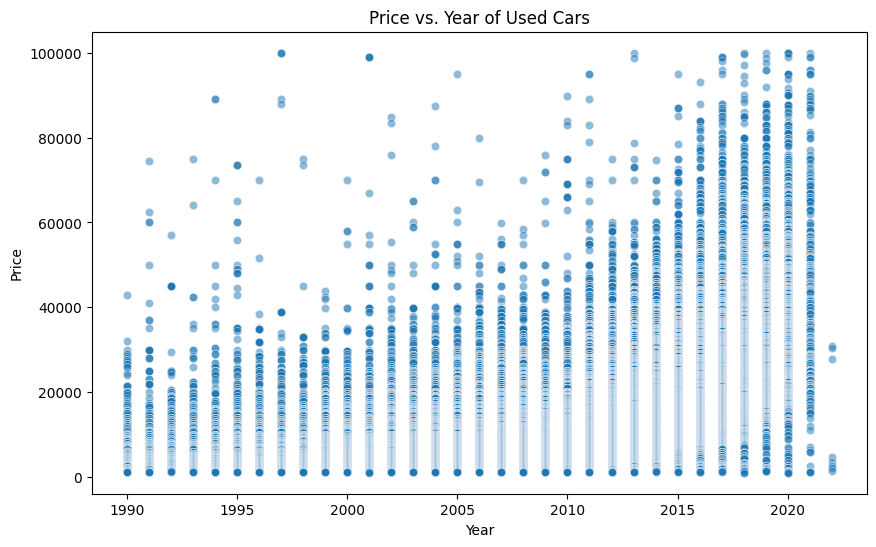

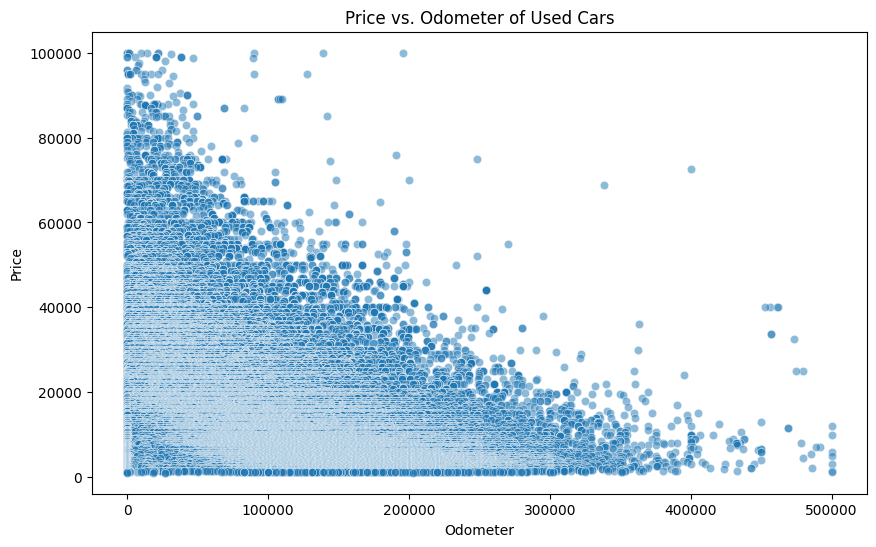

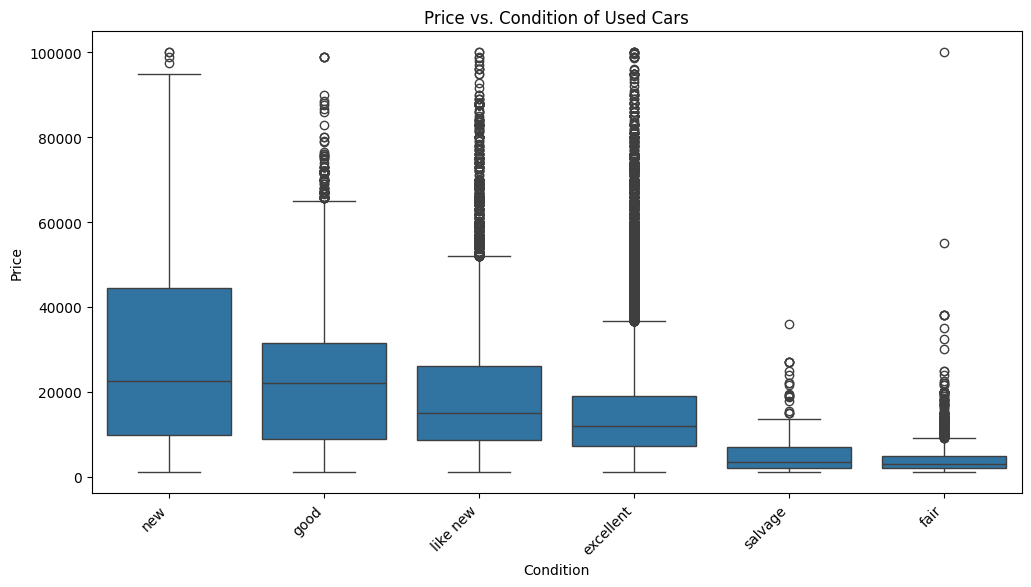

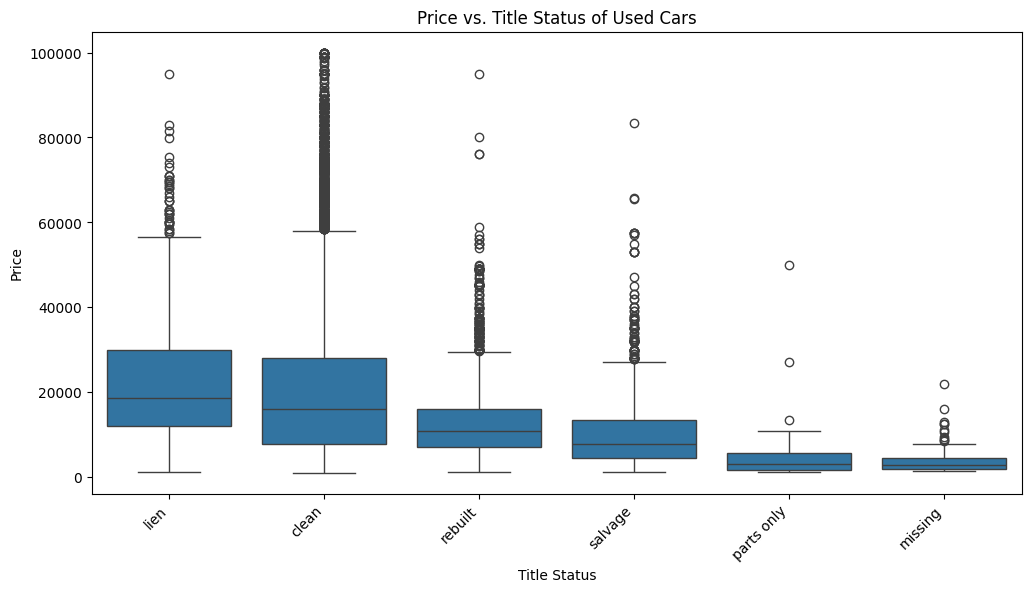

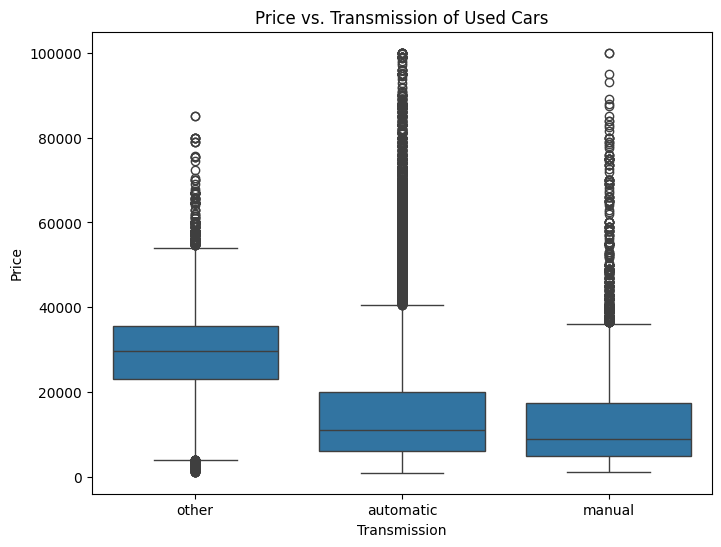

In [ ]:
# Plotting some features of used cars

import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of 'year' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=used_cars_sorted, x='year', y='price', alpha=0.5)
plt.title('Price vs. Year of Used Cars')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Scatter plot of 'odometer' vs 'price'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=used_cars_sorted, x='odometer', y='price', alpha=0.5)
plt.title('Price vs. Odometer of Used Cars')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.show()

# Box plot of 'condition' vs 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=used_cars_sorted, x='condition', y='price', order=condition_summary.sort_values(by='average_price', ascending=False)['condition'])
plt.title('Price vs. Condition of Used Cars')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Box plot of 'title_status' vs 'price'
plt.figure(figsize=(12, 6))
sns.boxplot(data=used_cars_sorted, x='title_status', y='price', order=title_status_summary.sort_values(by='average_price', ascending=False)['title_status'])
plt.title('Price vs. Title Status of Used Cars')
plt.xlabel('Title Status')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

# Box plot of 'transmission' vs 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(data=used_cars_sorted, x='transmission', y='price', order=transmission_summary.sort_values(by='average_price', ascending=False)['transmission'])
plt.title('Price vs. Transmission of Used Cars')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

In [ ]:
# prompt: import ployly library as px

import plotly.express as px